In [ ]:
!pip install qiskit

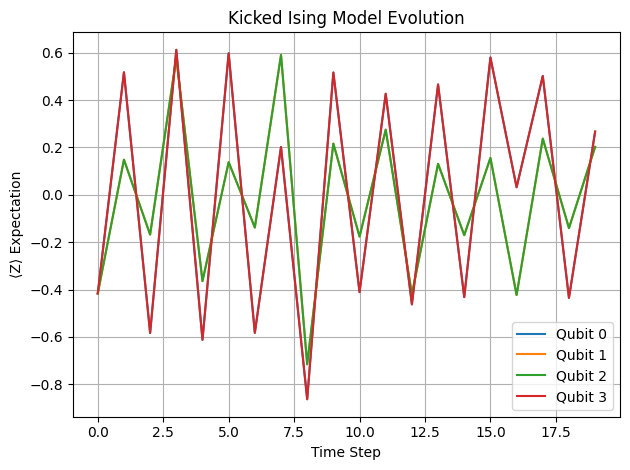

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_qubits = 4
n_steps = 20
J = 1.0      # Ising coupling
h = 1.0      # Kick strength
T = 1.0      # Period

# Function to apply Ising ZZ interaction
def apply_ising(circuit, J, T):
    for i in range(n_qubits - 1):
        circuit.cx(i, i+1)
        circuit.rz(2 * J * T, i+1)
        circuit.cx(i, i+1)

# Function to apply transverse field kick
def apply_kick(circuit, h):
    for i in range(n_qubits):
        circuit.rx(2 * h, i)

# Initialize state
state = Statevector.from_label('0' * n_qubits)

# Store expectation values of Z for each qubit over time
expectations = [[] for _ in range(n_qubits)]

# Time evolution
for step in range(n_steps):
    step_circuit = QuantumCircuit(n_qubits)
    apply_ising(step_circuit, J, T)
    apply_kick(step_circuit, h)
    state = state.evolve(step_circuit)

    # Measure Z expectation for each qubit
    for i in range(n_qubits):
        z_op = Pauli('Z' if i == 0 else 'I')
        for j in range(1, n_qubits):
            z_op = z_op.tensor(Pauli('Z' if j == i else 'I'))
        expectations[i].append(state.expectation_value(z_op).real)

# Plot results
for i in range(n_qubits):
    plt.plot(range(n_steps), expectations[i], label=f'Qubit {i}')

plt.xlabel('Time Step')
plt.ylabel('⟨Z⟩ Expectation')
plt.title('Kicked Ising Model Evolution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
